# Reconocimiento de Dígitos Escritos a Mano

Este código implementa un sistema de reconocimiento de dígitos escritos a mano utilizando el conjunto de datos MNIST y un modelo de red neuronal construido con TensorFlow/Keras. Consta de varias partes:



In [8]:
# Importa las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.utils import plot_model
from google.colab import files
from PIL import Image


import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import datetime
from tensorflow.keras.callbacks import Callback

## Preparación de Datos
- Carga y preprocesamiento del conjunto de datos MNIST.
- Normalización de los datos de entrada y codificación one-hot de las etiquetas.
- Inversión de los colores para tener dígitos negros sobre un fondo blanco.



In [2]:

# Carga y preprocesa el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliza los datos de entrada
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Codifica las etiquetas en one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Invierte los colores (dígitos negros sobre un fondo blanco)
x_train = 1.0 - x_train
x_test = 1.0 - x_test


11490434/11490434 [==============================] - 0s 0us/step


## Visualización
- Visualización de algunas imágenes de entrenamiento junto con sus etiquetas.


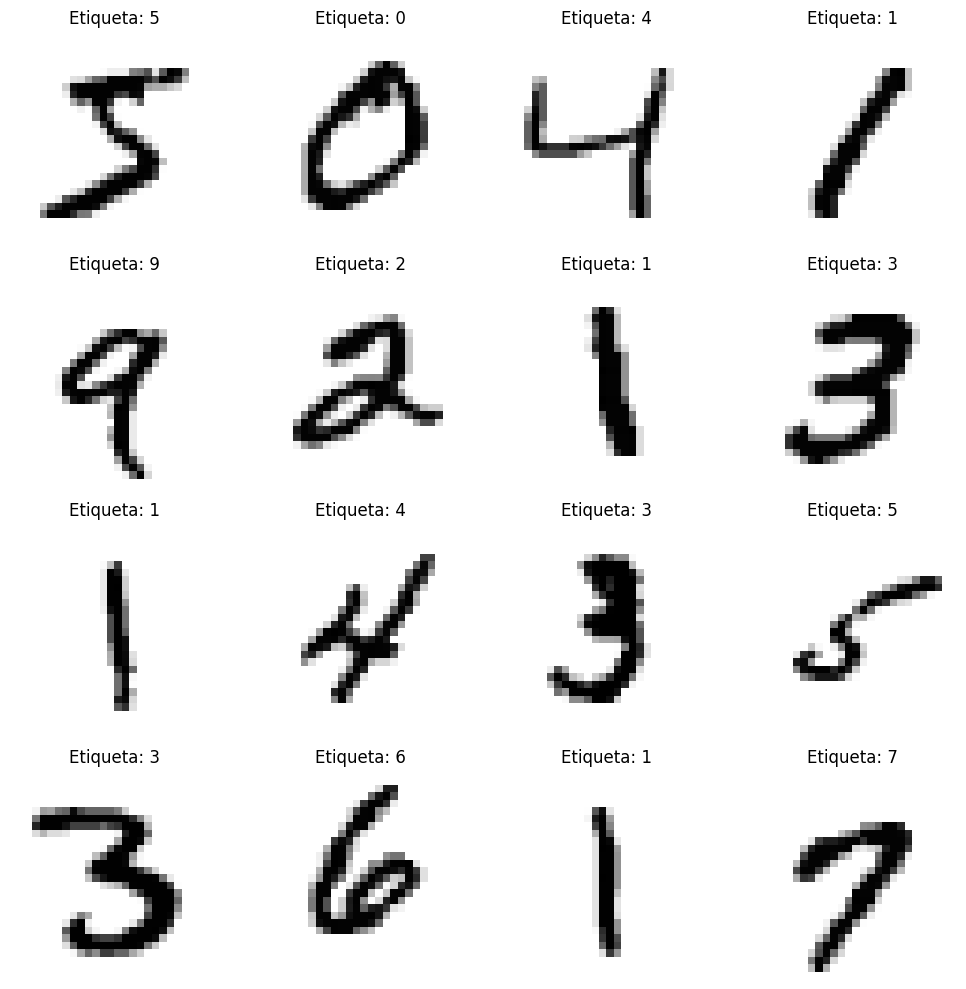

In [3]:
# Visualiza algunas imágenes de entrenamiento
def visualize_training_data(x, y, samples=16):
    plt.figure(figsize=(10, 10))
    for i in range(samples):
        plt.subplot(4, 4, i + 1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f"Etiqueta: {np.argmax(y[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualiza 16 muestras de entrenamiento
visualize_training_data(x_train, y_train)


## Construcción y Entrenamiento del Modelo
- Construcción de un modelo de red neuronal con múltiples capas densas.
- Compilación del modelo con el optimizador Adam y la pérdida de entropía cruzada categórica.
- Entrenamiento del modelo en el conjunto de datos de entrenamiento y evaluación de su rendimiento en el conjunto de datos de prueba.


In [6]:
# Construye el modelo de red neuronal
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplana la entrada de 28x28 píxeles a un vector unidimensional
    Dense(456, activation='relu'),  # Capa densamente conectada con 456 neuronas y función de activación ReLU
    Dense(256, activation='relu'),  # Capa densamente conectada con 256 neuronas y función de activación ReLU
    Dense(128, activation='relu'),  # Capa densamente conectada con 128 neuronas y función de activación ReLU
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas y función de activación Softmax
])

# Compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())  # Imprime un resumen del modelo


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 456)               357960    
                                                                 
 dense_5 (Dense)             (None, 256)               116992    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 509138 (1.94 MB)
Trainable params: 509138 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [10]:
# Entrena el modelo
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evalúa el modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Precisión en la prueba: {accuracy:.4f}')


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2448 - accuracy: 0.9230 - val_loss: 0.1971 - val_accuracy: 0.9398
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1938 - accuracy: 0.9386 - val_loss: 0.1713 - val_accuracy: 0.9451
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1638 - accuracy: 0.9477 - val_loss: 0.1488 - val_accuracy: 0.9553
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1453 - accuracy: 0.9539 - val_loss: 0.1400 - val_accuracy: 0.9545
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1306 - accuracy: 0.9585 - val_loss: 0.1304 - val_accuracy: 0.9587
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1178 - accuracy: 0.9630 - val_loss: 0.1505 - val_accuracy: 0.9553
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1115 - accuracy: 0.9654 - val_loss: 0.1584 - val_accuracy:


## Preprocesamiento de Imágenes y Predicción
- Preprocesamiento y centrado de imágenes cargadas para la predicción.
- Predicción del dígito en la imagen cargada utilizando el modelo de red neuronal entrenado.
- Visualización de la imagen preprocesada y el dígito predicho.




Saving no8.jpg to no8.jpg
no8.jpg
1/1 [==============================] - 0s 17ms/step


<ipython-input-13-7419d7ee691e>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail((20, 20), Image.ANTIALIAS)  # Reduce el tamaño de la imagen


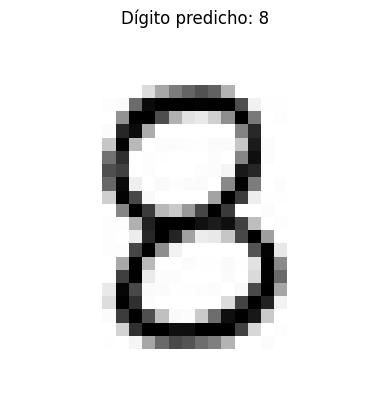

In [13]:
# Función para preprocesar y centrar la imagen cargada
def preprocess_and_center_image(img):

    img = img.convert('L')  # Convierte la imagen a escala de grises
    img.thumbnail((20, 20), Image.ANTIALIAS)  # Reduce el tamaño de la imagen

    # Crea un nuevo lienzo blanco de 28x28 píxeles
    new_img = Image.new('L', (28, 28), 255)
    # Pega la imagen redimensionada en el centro del lienzo
    new_img.paste(img, ((28 - img.size[0]) // 2, (28 - img.size[1]) // 2))

    img_array = img_to_array(new_img).astype('float32') / 255  # Convierte la imagen en un array y normaliza los valores

    img_array = np.squeeze(img_array, axis=-1)  # Elimina una dimensión de tamaño 1
    img_array = np.expand_dims(img_array, axis=0)  # Añade una dimensión al principio del array

    return img_array

# Función para preprocesar y predecir la imagen cargada
def predict_digit(img):
    img_array = preprocess_and_center_image(img)
    prediction = model.predict(img_array)
    digit = np.argmax(prediction)
    img_array=np.squeeze(img_array, axis=0)  # Elimina una dimensión de tamaño 1
    return digit,img_array



El sistema permite a los usuarios cargar una imagen que contenga un dígito escrito a mano, la preprocesa, predice el dígito utilizando el modelo de red neuronal entrenado y muestra el resultado.

In [ ]:

def upload_and_predict():
    from google.colab import files  # Esto se reemplazará con el método de carga de Kaggle
    uploaded = files.upload()  # Carga la imagen desde el usuario
    for fn in uploaded.keys():
        print(fn)
        # Carga la imagen
        img = load_img(fn)
        # Predice el dígito
        digit, img_array = predict_digit(img)

        # Muestra la imagen preprocesada
        plt.imshow(img_array, cmap='gray')
        plt.title(f'Dígito predicho: {digit}')
        plt.axis('off')
        plt.show()
# Descomenta la línea de abajo para cargar y predecir una imagen
upload_and_predict()